# 📊Projet: Analyse des données financières d'Apple

_____
## Objectif

Ce projet vise à transformer les données brutes des marchés financiers en insights stratégiques exploitables. En combinant extraction systématique, traitement rigoureux et analyse quantitative approfondie des données d'Apple, nous établirons un diagnostic complet de la performance du titre et identifierons les patterns clés susceptibles de guider des recommandations d'investissement précises et ciblées.

### 1. Analyse Exploratoire des Données (EDA)
- Collecter et nettoyer les données historiques du cours d'Apple (AAPL)
- Visualiser les rendements
- Visualiser l'évolution du prix, du volume et de la volatilité
- Analyser les statistiques descriptives (moyenne, écart-type, distribution)

### 2. Feature Engineering
- Créer des indicateurs techniques : 
  - Moyennes mobiles (SMA, EMA)
  - RSI (Relative Strength Index)
  - MACD (Moving Average Convergence Divergence)
  - OBV (On Balance Volume)
  - A/D Line (Indicateur d'accumulation et de distribution)
  - CMF (Chaikin Money Flow)
- Générer des features temporelles (jour de la semaine, mois, trimestre)
- Calculer les returns et log-returns

### 3. Backtesting et mesure de performance
- Implémenter une stratégie de Backtesting
- Mesurer les performances de la stratégiegies
______________

## Importatiton des librairies

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf #librairie pour importer les données financières
import seaborn as sns

## Importation des données

In [126]:
# télécharger le cours de l'actionn apple entre 20220 et 2024
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

C:\Users\vanst\AppData\Local\Temp\ipykernel_19852\248312410.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [127]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


In [128]:
#supprimer le nivau ticker
apple.columns =  apple.columns.droplevel("Ticker")

In [129]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


## Nettoyage des données

In [130]:
apple.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,151.728301,153.253333,150.026017,151.571824,9.061168e+07
std,41.896384,42.035036,41.671141,41.835807,5.324605e+07
min,54.316940,55.316759,51.470005,55.215083,2.323470e+07
25%,126.607040,127.694595,124.586290,126.080089,5.546960e+07
50%,150.366394,152.119813,148.366952,150.191808,7.629970e+07
75%,176.243698,177.947034,174.809363,176.090173,1.077601e+08
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08


In [131]:
#identifier les valeurs manquantes
apple.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [132]:
# vérifier les lignes ayant des doublons
apple[apple.duplicated()]

Price,Close,High,Low,Open,Volume
Date,,,,,


## Rendements

In [133]:
# on va creer une nouvelle colonne pour le rendement, on peut le faire de manière automatique et manuelle
# Formule
#apple["close_term_minus1"] = apple["close"].shift(1) #prix/valeur de cloture à la date précédente
#apple["Dailyreturn_manual"] = (apple["close"] - apple["close_term_minus1"])/apple["close_term_minus1"]

#calculer les rendements quotidiens
apple["DailyReturn"] = apple["Close"].pct_change()

In [134]:
apple

Price,Close,High,Low,Open,Volume,DailyReturn
Date,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086
...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.003065
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011478
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003176


In [135]:
#Calculer les rendements cumulés
apple["CumulativeReturn"] = (1+ apple["DailyReturn"]).cumprod()

In [136]:
apple

Price,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn
Date,,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455
...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.003065,3.506648
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011478,3.546897
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003176,3.558161


In [137]:
apple.DailyReturn.describe()

count    1256.000000
mean        0.001189
std         0.019962
min        -0.128647
25%        -0.008426
50%         0.001210
75%         0.012017
max         0.119808
Name: DailyReturn, dtype: float64

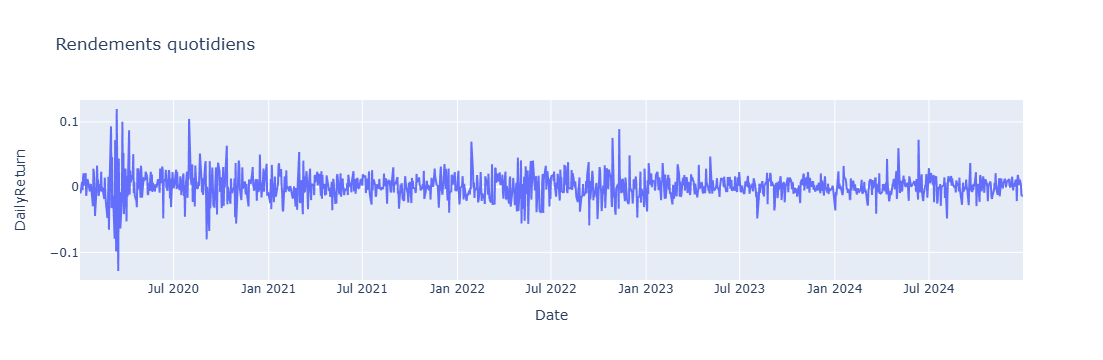

In [242]:
# Visualiser le rendement sur un graphique
#apple["DailyReturn"].plot(title="Rendements quotidiens")
import plotly.express as px
fig = px.line(apple, x= apple.index, y = 'DailyReturn', title = 'Rendements quotidiens')
fig.show()

Text(0.5, 1.0, 'Rendements quotidiens')

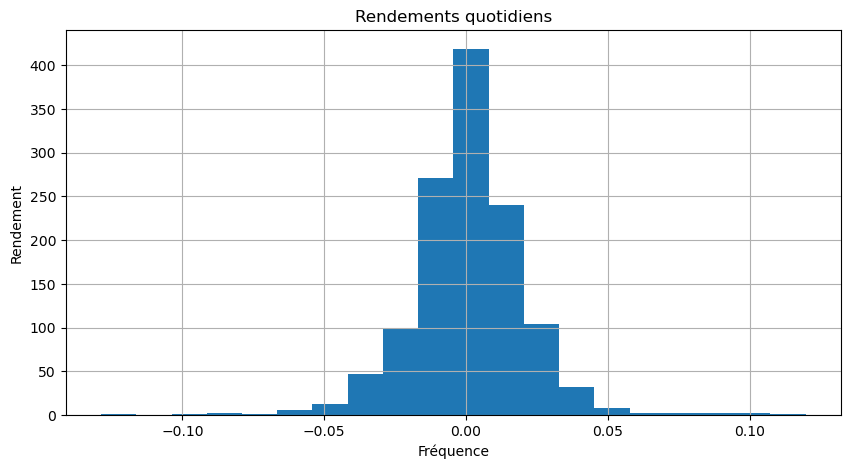

In [139]:
#afficher l'histogramme des rendements
plt.figure(figsize=(10,5))
apple["DailyReturn"].hist(bins=20)
plt.xlabel('Fréquence')
plt.ylabel('Rendement')
plt.title('Rendements quotidiens')

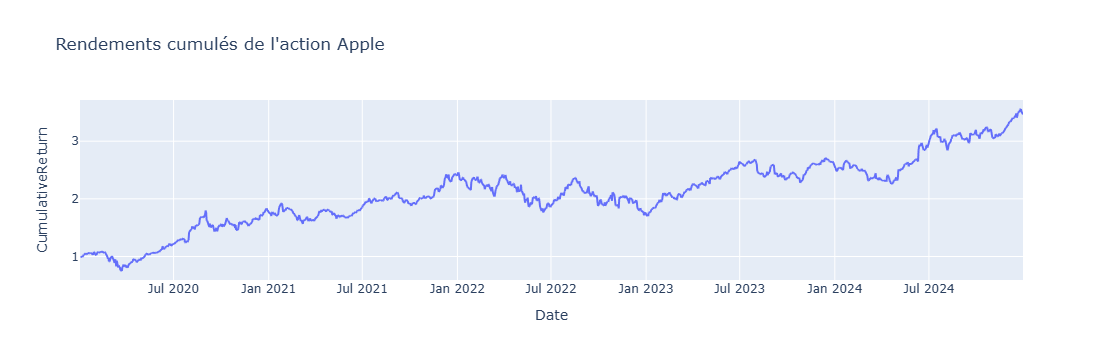

In [140]:
#Visualiser les rendements cumulés
import plotly.express as px
fig = px.line(apple, x= apple.index, y = 'CumulativeReturn', title = "Rendements cumulés de l'action Apple")
fig.show()

On voit bien les tendances à la hausse

Text(0.5, 1.0, 'Rendements quotidiens')

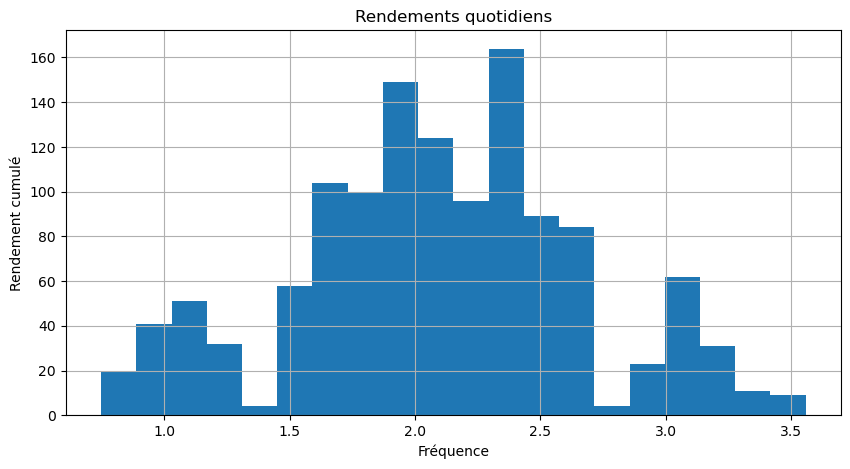

In [141]:
#afficher l'histogramme des rendements
plt.figure(figsize=(10,5))
apple["CumulativeReturn"].hist(bins=20)
plt.xlabel('Fréquence')
plt.ylabel('Rendement cumulé')
plt.title('Rendements quotidiens')

## Mesurer et interpréter la volatilité

In [142]:
#calcul de la volatilité journalière
apple["volatility_dayly"] = apple["DailyReturn"].rolling(window=21).std()

In [143]:
#Calcul de la volatilité annuelle
apple["Volatility_annualized"] = apple["volatility_dayly"] * (252**0.5)

In [144]:
apple["volatility_dayly"].mean()*100

1.8133425327507973

In [145]:
apple["Volatility_annualized"].mean()*100

28.785920300607643

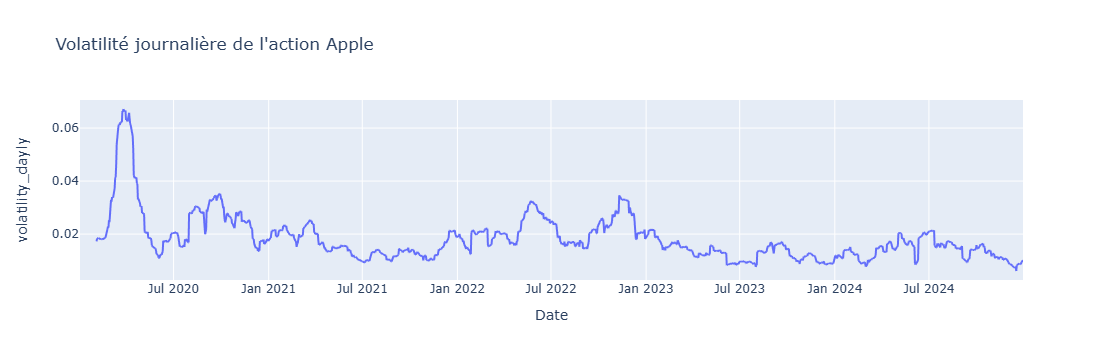

In [244]:
### Visualiser la volatilité
fig = px.line(apple, x= apple.index, y = 'volatility_dayly', title = "Volatilité journalière de l'action Apple")
fig.show()

Ce graphique illustre les périodes à plus forte et à plus faible volatilité

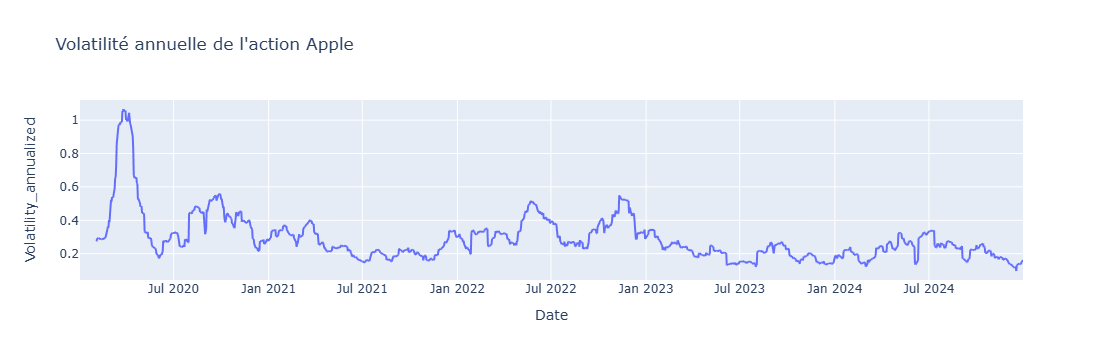

In [243]:
fig = px.line(apple, x= apple.index, y = 'Volatility_annualized', title = "Volatilité annuelle de l'action Apple")
fig.show()

Plus la volatilité est élevé plus l'action est instable

## Analyser la moyenne mobile simple (SMA)

In [148]:
apple["SMA_20"] = apple["Close"].rolling(window=20).mean()
apple["SMA_10"] = apple["Close"].rolling(window=10).mean()

In [149]:
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn,volatility_dayly,Volatility_annualized,SMA_20,SMA_10
Date,,,,,,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278,NaN,NaN,NaN,NaN
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169,NaN,NaN,NaN,NaN
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474,NaN,NaN,NaN,NaN
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455,NaN,NaN,NaN,NaN


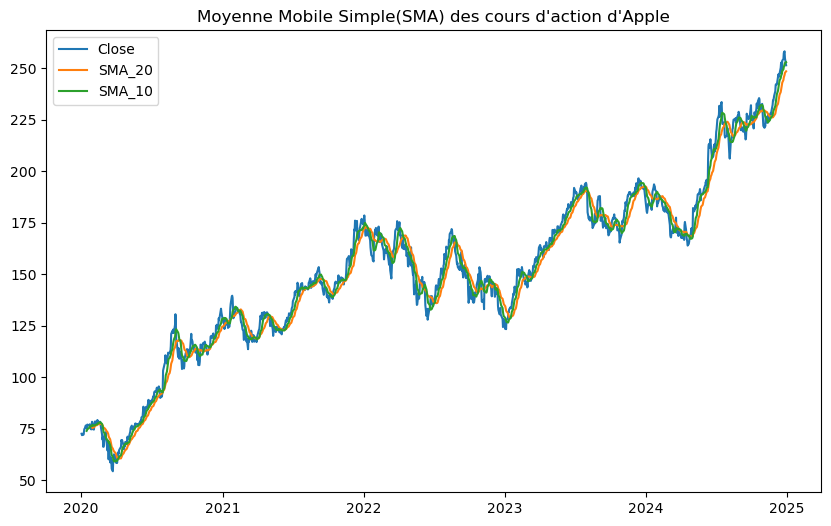

In [150]:
plt.figure(figsize=(10,6))
plt.plot(apple["Close"], label= "Close")
plt.plot(apple["SMA_20"], label= "SMA_20")
plt.plot(apple["SMA_10"], label= "SMA_10")
plt.title("Moyenne Mobile Simple(SMA) des cours d'action d'Apple")
plt.legend()
plt.show()

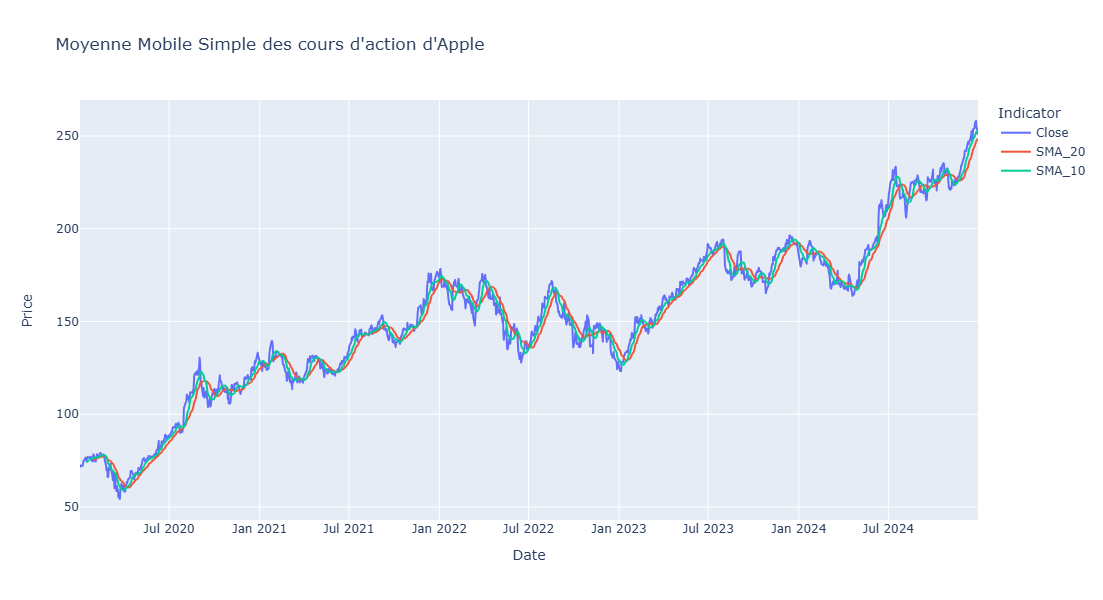

In [151]:
import plotly.express as px

# Préparer les données au format long
apple_plot = apple[["Close", "SMA_20", "SMA_10"]].reset_index()
apple_melted = apple_plot.melt(id_vars='Date', 
                                value_vars=["Close", "SMA_20", "SMA_10"],
                                var_name='Indicator', 
                                value_name='Price')

# Créer le graphique
fig = px.line(apple_melted, x='Date', y='Price', color='Indicator',
              title="Moyenne Mobile Simple des cours d'action d'Apple",
              width=1000, height=600)

fig.show()

## Analyser la moyenne mobile exponentielle (EMA)

In [152]:
#Calculer la moyenne mobile exponentielle
apple["EMA"] = apple["Close"].ewm(alpha=0.55).mean()

In [153]:
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn,volatility_dayly,Volatility_annualized,SMA_20,SMA_10,EMA
Date,,,,,,,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN,NaN,NaN,NaN,NaN,72.538521
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278,NaN,NaN,NaN,NaN,72.052155
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169,NaN,NaN,NaN,NaN,72.266087
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474,NaN,NaN,NaN,NaN,72.150849
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455,NaN,NaN,NaN,NaN,72.752404


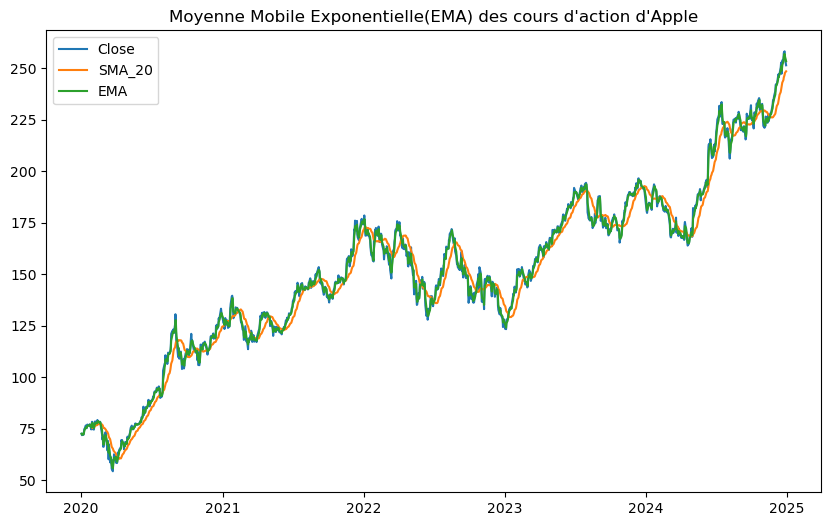

In [154]:
plt.figure(figsize=(10,6))
plt.plot(apple["Close"], label= "Close")
plt.plot(apple["SMA_20"], label= "SMA_20")
plt.plot(apple["EMA"], label= "EMA")
plt.title("Moyenne Mobile Exponentielle(EMA) des cours d'action d'Apple")
plt.legend()
plt.show()

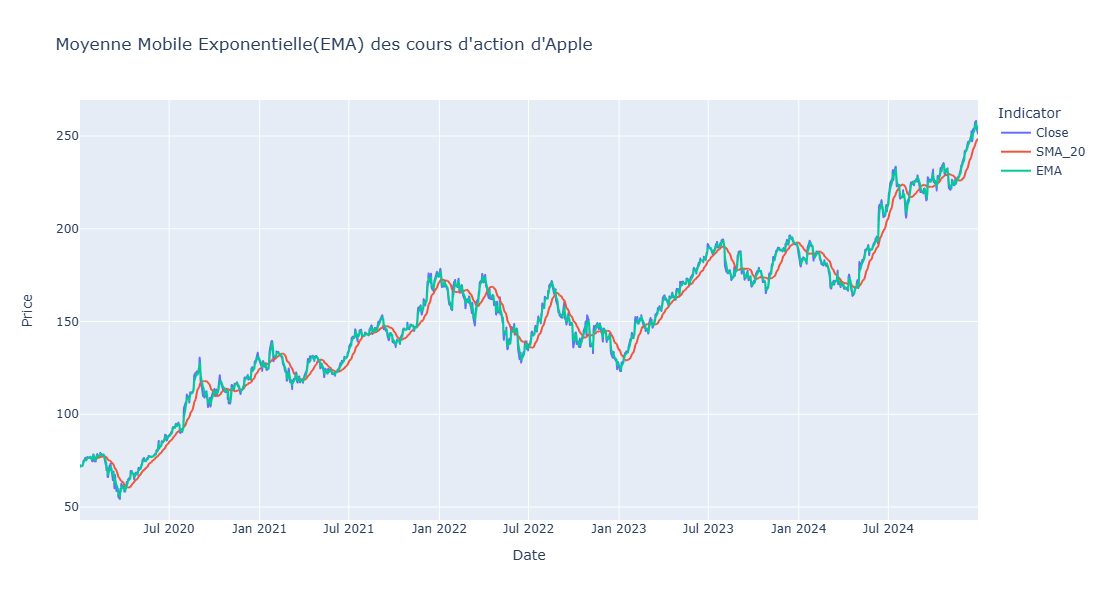

In [155]:
import plotly.express as px

# Préparer les données au format long
apple_plot = apple[["Close", "SMA_20", "EMA"]].reset_index()
apple_melted = apple_plot.melt(id_vars='Date', 
                                value_vars=["Close", "SMA_20", "EMA"],
                                var_name='Indicator', 
                                value_name='Price')

# Créer le graphique
fig = px.line(apple_melted, x='Date', y='Price', color='Indicator',
              title="Moyenne Mobile Exponentielle(EMA) des cours d'action d'Apple",
              width=1000, height=600)

fig.show()

## Interpréter les indicateurs de technique

### Interpréter le RSI

In [157]:
#Pour calculer le RSI on va d'abord caluler les RS(moyenne des gains sur n periodes/ moyenne des pertes sur n periodes)
#Pour calculer le RS on va d'abord déterminer la différence "diff" entre 2 dates 
apple["Diff"] = apple["Close"].diff()

In [158]:
#Calcul des gains et des pertes (le gain si diff>0 et perte si diff<0)
apple["Gain"] = apple["Diff"].apply(lambda x: x if x > 0 else 0)
apple["Loss"] = apple["Diff"].apply(lambda x: -x if x < 0 else 0)

#puis on rajoute la fenêtre de 14jours pour le calcul des RSI et le calcul des SMA
window = 14
apple["Avg_gain"] = apple["Gain"].rolling(window=window).mean()
apple["Avg_loss"] = apple["Loss"].rolling(window=window).mean()
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn,volatility_dayly,Volatility_annualized,SMA_20,SMA_10,EMA,Diff,Gain,Loss,Avg_gain,Avg_loss
Date,,,,,,,,,,,,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN,NaN,NaN,NaN,NaN,72.538521,NaN,0.000000,0.000000,NaN,NaN
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278,NaN,NaN,NaN,NaN,72.052155,-0.705231,0.000000,0.705231,NaN,NaN
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169,NaN,NaN,NaN,NaN,72.266087,0.572388,0.572388,0.000000,NaN,NaN
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474,NaN,NaN,NaN,NaN,72.150849,-0.340523,0.000000,0.340523,NaN,NaN
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455,NaN,NaN,NaN,NaN,72.752404,1.159248,1.159248,0.000000,NaN,NaN


In [159]:
#Calcul de RS (relative strength)
apple["RS"] = apple["Avg_gain"] / apple["Avg_loss"]

In [160]:
# Calcul du RSI
apple["RSI"] = 100 - (100 /(1 + apple["RS"]))

In [162]:
apple["RSI"].describe()

count    1244.000000
mean       54.989778
std        17.233610
min         3.179865
25%        42.579684
50%        55.840715
75%        68.366750
max        96.162983
Name: RSI, dtype: float64

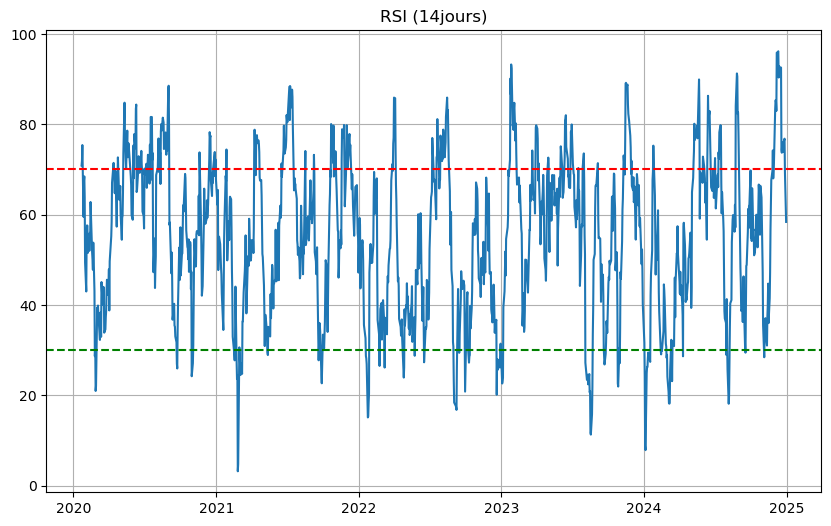

In [163]:
plt.figure(figsize=(10,6))
plt.plot(apple["RSI"], label= "RSI")
plt.title("RSI (14jours)")
plt.axhline(70, color='red', linestyle = '--')
plt.axhline(30, color='green', linestyle = '--')
plt.grid()
plt.show()

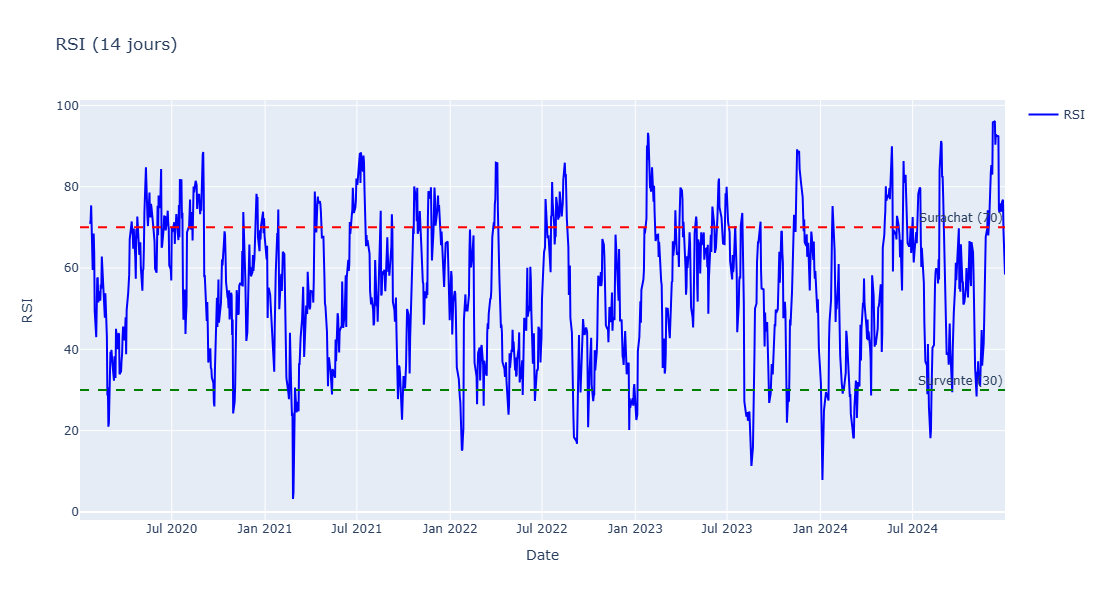

In [164]:
import plotly.graph_objects as go

# Créer la figure
fig = go.Figure()

# Ajouter la courbe RSI
fig.add_trace(go.Scatter(x=apple.index, y=apple["RSI"], 
                         mode='lines', name='RSI',
                         line=dict(color='blue')))

# Ajouter les lignes horizontales (seuils)
fig.add_hline(y=70, line_dash="dash", line_color="red", 
              annotation_text="Surachat (70)")
fig.add_hline(y=30, line_dash="dash", line_color="green", 
              annotation_text="Survente (30)")

# Personnaliser le layout
fig.update_layout(
    title="RSI (14 jours)",
    xaxis_title="Date",
    yaxis_title="RSI",
    width=1000,
    height=600,
    hovermode='x unified',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()

### Analyse et Interprétation des tendances avec MACD

In [165]:
#calcul du des EMA12 et EMA26
apple["EMA_12"] = apple["Close"].ewm(span=12, adjust=False).mean()
apple["EMA_26"] = apple["Close"].ewm(span=26, adjust=False).mean()

#Calcul du MACD
apple["MACD"] = apple["EMA_26"] - apple["EMA_12"]

#calcul du signal line
apple["Signal_line"] = apple["MACD"].ewm(span=9, adjust=False).mean()

#Calcul de l'histogramme
apple["Histogram"] = apple["MACD"] - apple["Signal_line"]


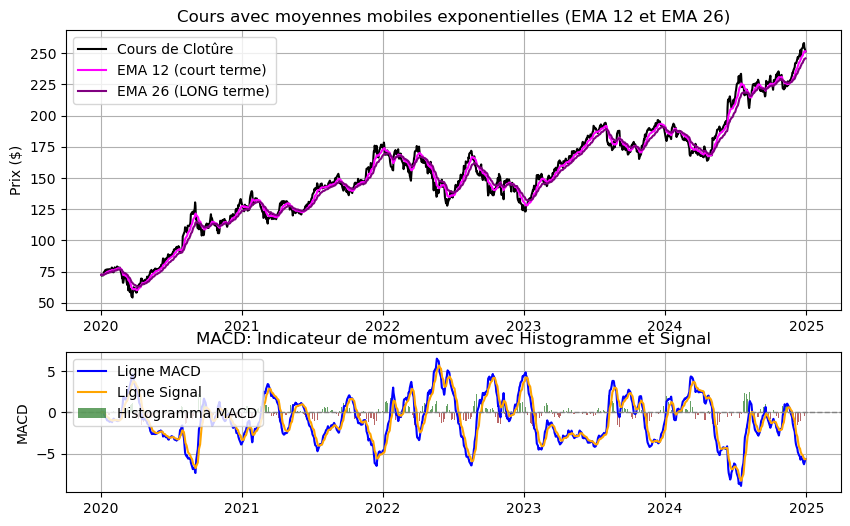

In [169]:
import matplotlib.gridspec as gridspec

#personnaliser les couleurs pour l'histogramme
colors = ['darkgreen' if val >= 0 else 'darkred' for val in apple['Histogram']]

fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2, 1, height_ratios = [2,1], hspace=0.2)

#Graphique des prix et EMA
ax1 = plt.subplot(gs[0])
ax1.plot(apple["Close"], label = 'Cours de Clotûre', color = 'black')
ax1.plot(apple["EMA_12"], label = 'EMA 12 (court terme)', color = 'magenta')
ax1.plot(apple["EMA_26"], label = 'EMA 26 (LONG terme)', color = 'purple')
ax1.set_title("Cours avec moyennes mobiles exponentielles (EMA 12 et EMA 26)")
ax1.set_ylabel("Prix ($)")
ax1.legend(loc='upper left')
ax1.grid(True)

#Graphique MACD
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.bar(apple.index, apple["Histogram"], color = colors, alpha=0.6, label = 'Histogramma MACD')
ax2.plot(apple["MACD"], label = 'Ligne MACD', color = 'blue')
ax2.plot(apple["Signal_line"], label = 'Ligne Signal', color = 'orange')
ax2.axhline(0, color = 'gray', linewidth=1, linestyle='--')
ax2.set_title("MACD: Indicateur de momentum avec Histogramme et Signal")
ax2.set_ylabel("MACD")
ax2.legend(loc='upper left')
ax2.grid(True)

Interprétation:

### OBV

In [170]:
#fonction pour calculer l'OBV quiu est un indicateur permettant de mesurer la pression d'achat et de vente à travers les volumes
def calculate_obv(data):
    obv = [0] #initialisation à 0
    close = data['Close'].values
    volume = data['Volume'].values
    
    for i in range(1, len(data)):
        if close[i] > close[i-1]:
            obv.append(obv[-1] + volume[i])
        elif close[i] < close[i-1]:
            obv.append(obv[-1] - volume[i])
        else:
            obv.append(obv[-1])
    data = data.copy()
    data['OBV'] = obv
    return data

In [173]:
apple = calculate_obv(apple)
apple.head()

Price,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn,volatility_dayly,Volatility_annualized,SMA_20,...,Avg_gain,Avg_loss,RS,RSI,EMA_12,EMA_26,MACD,Signal_line,Histogram,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.538521,72.538521,0.000000,0.000000,0.000000,0
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.430024,72.486282,0.056258,0.011252,0.045006,-146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.426278,72.480311,0.054033,0.019808,0.034225,-27935600
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.370721,72.449559,0.078838,0.031614,0.047224,-136807600
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.502057,72.506954,0.004898,0.026271,-0.021373,-4728400


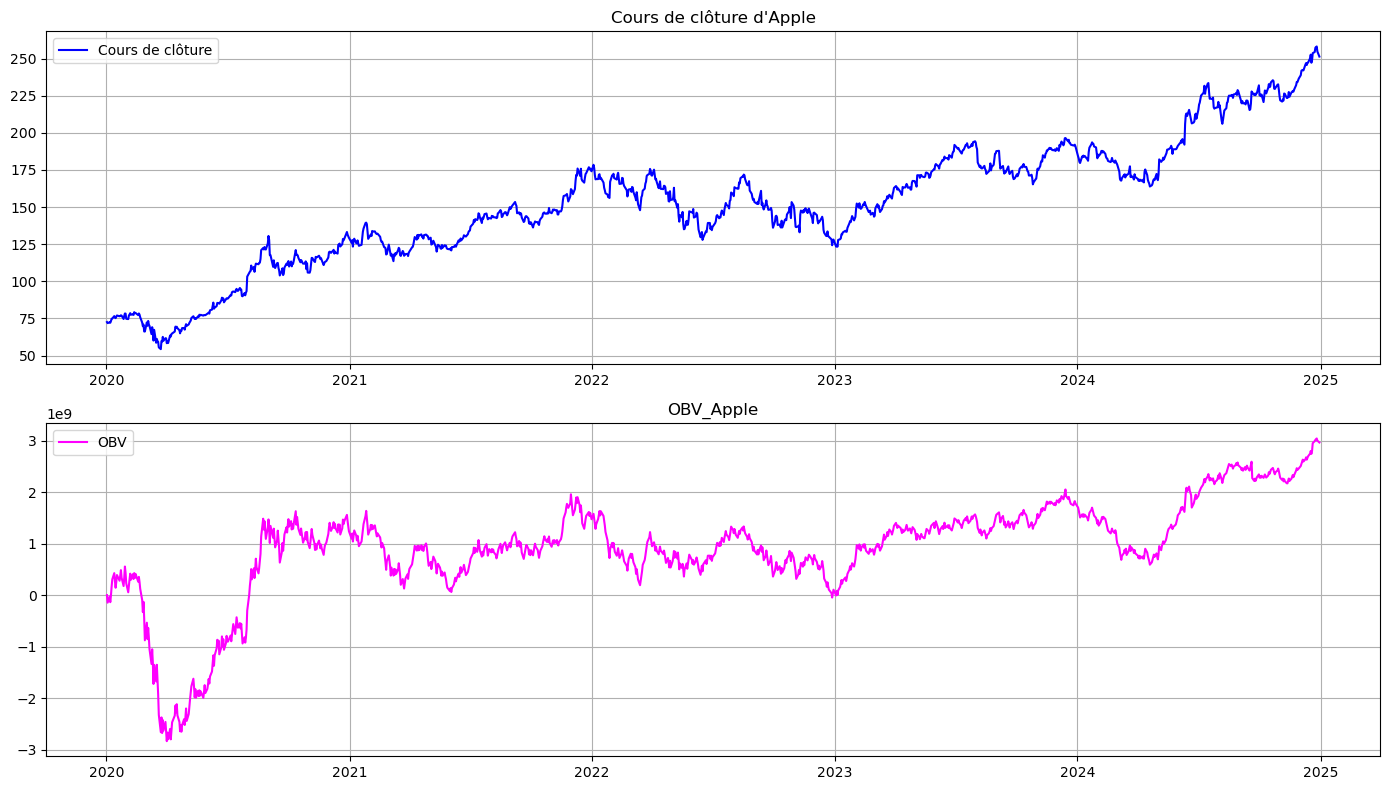

In [175]:
# Visualisation du graphique de l'OBV
plt.figure(figsize=(14,8))

#Cours de clôture
plt.subplot(2,1,1)
plt.plot(apple["Close"], label= "Cours de clôture", color='blue')
plt.title("Cours de clôture d'Apple")
plt.legend()
plt.grid()

#OBV
plt.subplot(2,1,2)
plt.plot(apple["OBV"], label= "OBV", color='magenta')
plt.title("OBV_Apple")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Indicateur d'accumulation/distribution (A/D Line)

In [176]:
plot_data = apple.copy()
plot_data = plot_data.reset_index()

In [178]:
plot_data

Price,Date,Close,High,Low,Open,Volume,DailyReturn,CumulativeReturn,volatility_dayly,Volatility_annualized,...,Avg_gain,Avg_loss,RS,RSI,EMA_12,EMA_26,MACD,Signal_line,Histogram,OBV
0,2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.538521,72.538521,0.000000,0.000000,0.000000,0
1,2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800,-0.009722,0.990278,NaN,NaN,...,NaN,NaN,NaN,NaN,72.430024,72.486282,0.056258,0.011252,0.045006,-146322800
2,2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,0.007968,0.998169,NaN,NaN,...,NaN,NaN,NaN,NaN,72.426278,72.480311,0.054033,0.019808,0.034225,-27935600
3,2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000,-0.004703,0.993474,NaN,NaN,...,NaN,NaN,NaN,NaN,72.370721,72.449559,0.078838,0.031614,0.047224,-136807600
4,2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,0.016086,1.009455,NaN,NaN,...,NaN,NaN,NaN,NaN,72.502057,72.506954,0.004898,0.026271,-0.021373,-4728400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.003065,3.506648,0.008669,0.137616,...,1.390067,0.491826,2.826341,73.865371,248.171347,242.419954,-5.751393,-5.208142,-0.543251,2993894800
1253,2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011478,3.546897,0.008772,0.139258,...,1.572988,0.491826,3.198264,76.180631,249.573702,243.521191,-6.052511,-5.377015,-0.675495,3017129500
1254,2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003176,3.558161,0.008616,0.136768,...,1.629215,0.491826,3.312586,76.812056,250.886014,244.601379,-6.284635,-5.558539,-0.726095,3044366600
1255,2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-0.013242,3.511043,0.009431,0.149708,...,1.629215,0.721722,2.257399,69.300656,251.470609,245.348379,-6.122230,-5.671277,-0.450952,3002011300


In [191]:
#calcul de CLV
clv = ((plot_data["Close"] - plot_data["Low"]) - (plot_data["High"] - plot_data["Close"]))/ (plot_data["High"] - plot_data["Low"])
#on remplace les valeurs manquantes par 0
clv.fillna(0)

0       0.907579
1      -0.544120
2       0.955616
3      -0.467831
4       0.656593
          ...   
1252    0.654554
1253    0.993165
1254    0.125493
1255   -0.102840
1256    0.054543
Length: 1257, dtype: float64

In [192]:
# Calcul de MFV (Money Flow Volume)
mfv = clv * plot_data["Volume"]

In [193]:
#Calcul de A/D
ad = mfv.cumsum()

#Ajout des métriques dans ma base
plot_data["CLV"] = clv
plot_data["MFV"] = mfv
plot_data["A/D"] = ad

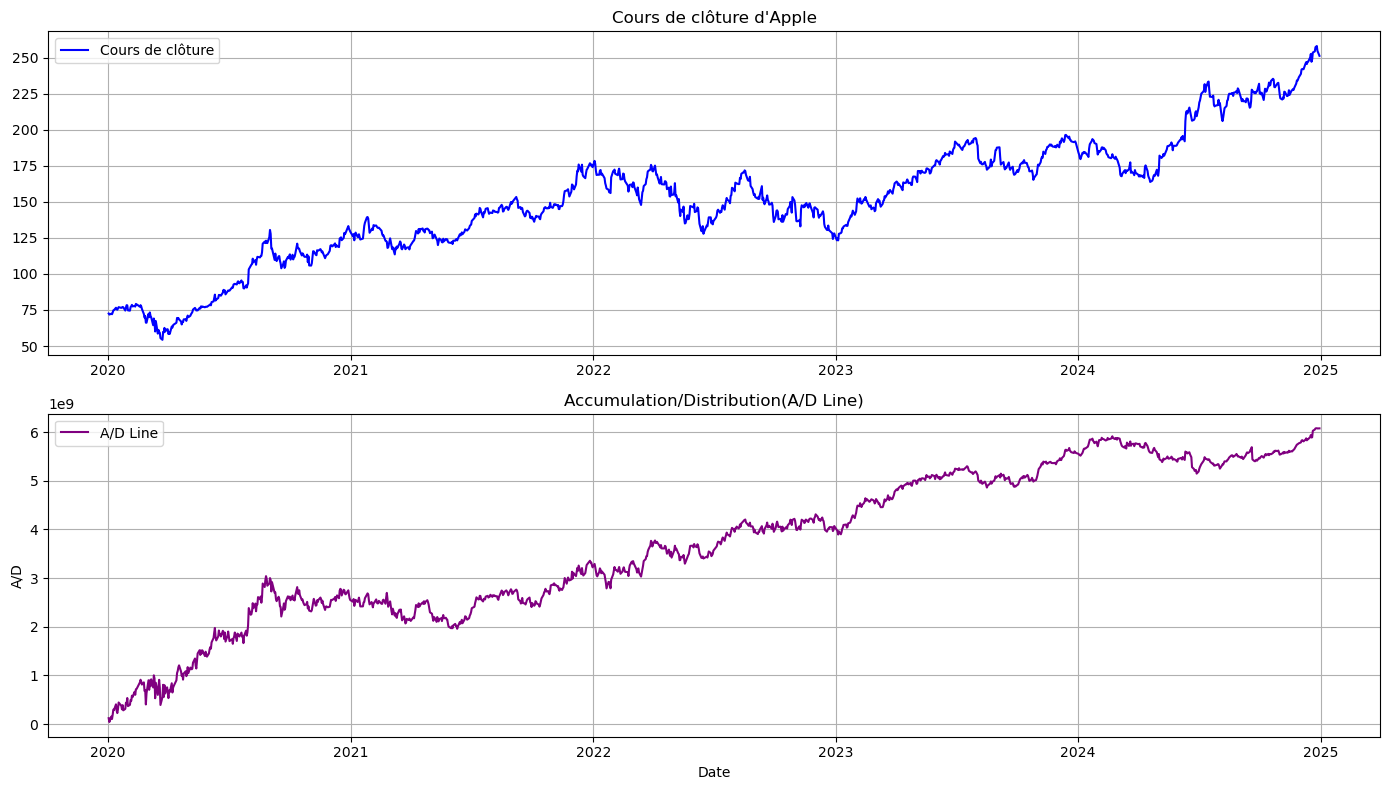

In [206]:
# Visualisation du graphique de l'A/D
plt.figure(figsize=(14,8))

#Cours de clôture
plt.subplot(2,1,1)
plt.plot(plot_data["Date"], plot_data["Close"], label= "Cours de clôture", color='blue')
plt.title("Cours de clôture d'Apple")
plt.legend()
plt.grid()

#OBV
plt.subplot(2,1,2)
plt.plot(plot_data["Date"], plot_data["A/D"], label= "A/D Line", color='purple')
plt.title("Accumulation/Distribution(A/D Line)")
plt.xlabel("Date")
plt.ylabel("A/D")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Chaikin Money Flow (CMF)

In [201]:
# Calcul de CMF
cmf = plot_data["MFV"].rolling(window=20).sum() / plot_data["Volume"].rolling(window=20).sum()
cmf

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1252    0.401843
1253    0.379887
1254    0.364163
1255    0.349136
1256    0.325808
Length: 1257, dtype: float64

In [202]:
plot_data["CMF"] = cmf

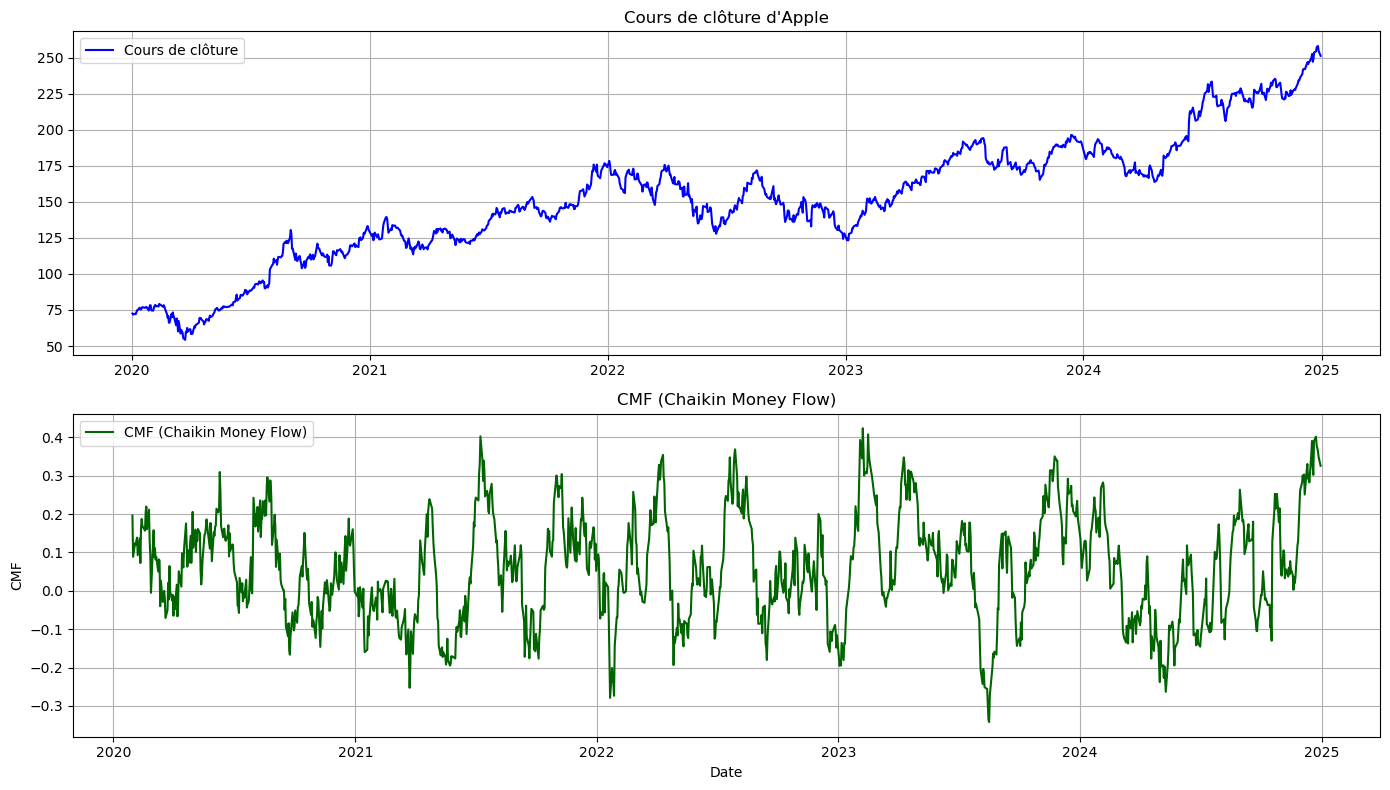

In [205]:
# Visualisation du graphique de l'CMF
plt.figure(figsize=(14,8))

#Cours de clôture
plt.subplot(2,1,1)
plt.plot(plot_data["Date"], plot_data["Close"], label= "Cours de clôture", color='blue')
plt.title("Cours de clôture d'Apple")
plt.legend()
plt.grid()

#CMF
plt.subplot(2,1,2)
plt.plot(plot_data["Date"], plot_data["CMF"], label= "CMF (Chaikin Money Flow)", color='darkgreen')
plt.title("CMF (Chaikin Money Flow)")
plt.xlabel("Date")
plt.ylabel("CMF")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Backtesting et Mesure de performance

### Stratégie de Backtesting Simple

In [207]:
#Pour implémenter cette stratégie on va utiliser la SMA courte (20jours) et le SMA longue (50jours)
#Ayant déjà déterminé la SMA_20 on va calculer la SMA_50
apple["SMA_50"] = apple["Close"].rolling(window=50).mean()

In [209]:
#initialisation du signal
apple["Signal"] = 0
apple.loc[apple["SMA_20"] > apple["SMA_50"], "Signal"] = 1
apple.loc[apple["SMA_20"] < apple["SMA_50"], "Signal"] = 0

In [210]:
#On calcule la position qui est la variation du signal entre 2 dates
apple["Position"] = apple["Signal"].diff()

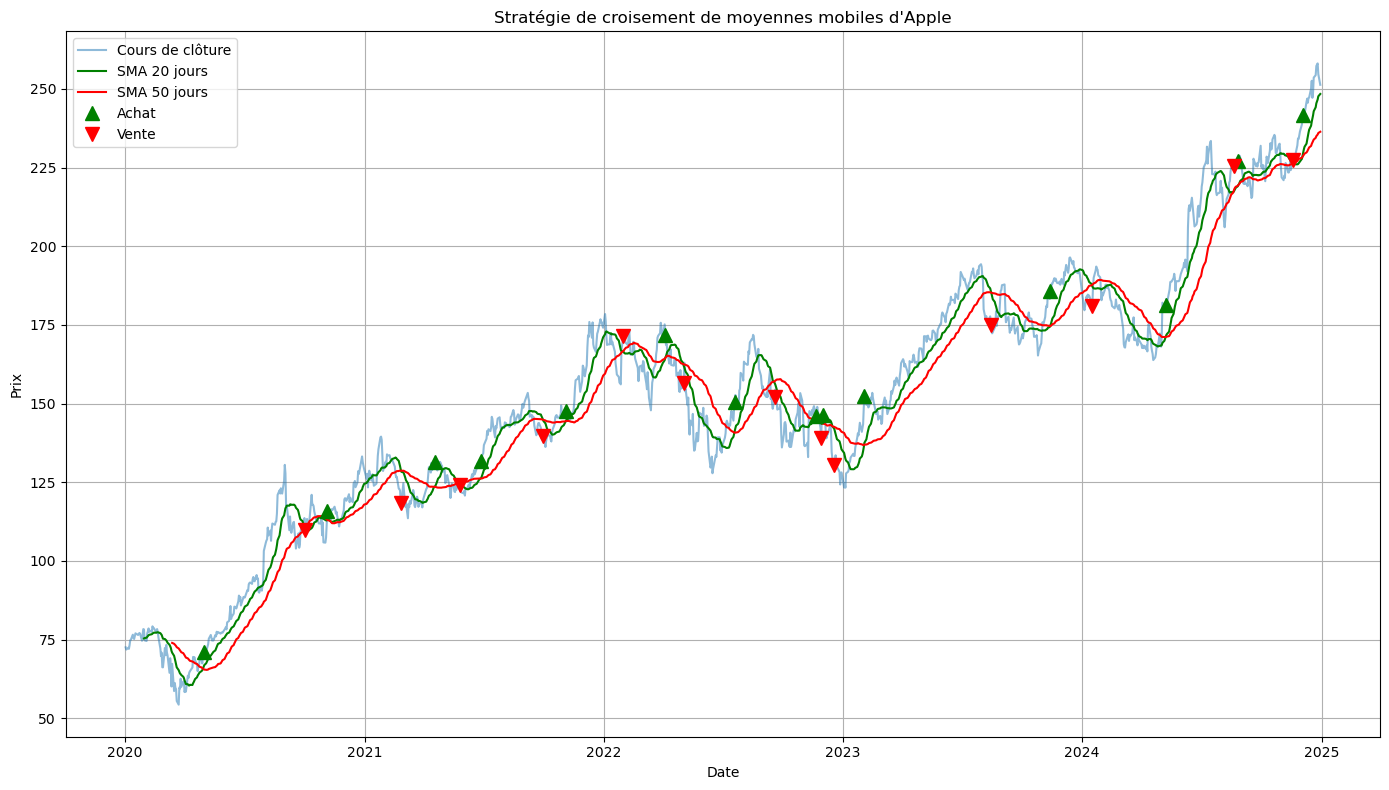

In [212]:
plt.figure(figsize=(14,8))
plt.plot(apple["Close"], label= "Cours de clôture", alpha = 0.5)
plt.plot(apple["SMA_20"], label= "SMA 20 jours", color='green')
plt.plot(apple["SMA_50"], label= "SMA 50 jours", color='red')

#Points d'achat
plt.plot(apple[apple["Position"] == 1].index, apple["Close"][apple["Position"] ==1], '^', color= 'green', markersize =10, label='Achat')

#Points de vente
plt.plot(apple[apple["Position"] == -1].index, apple["Close"][apple["Position"] == -1], 'v', color= 'red', markersize =10, label='Vente')

plt.title("Stratégie de croisement de moyennes mobiles d'Apple")
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [215]:
import backtrader as bt

#on va sélectionner les colonnes pertinentes pour le trading
data = apple[['Open', 'High','Low', 'Close', 'Volume']].copy()

#on supprime les lignes incomplètes
data.dropna(inplace=True)

#on converti le nom des colonnes en minuscule pour backtrader
data.columns = [col.lower() for col in data.columns]

#on remet l'index date sous forme de colonne pour backtrader
data.reset_index(inplace=True)

In [216]:
data

,Date,open,high,low,close,volume
0,2020-01-02,71.545897,72.598899,71.292311,72.538521,135480400
1,2020-01-03,71.765667,72.594055,71.608685,71.833290,146322800
2,2020-01-06,70.954188,72.444321,70.703012,72.405678,118387200
3,2020-01-07,72.415345,72.671348,71.845377,72.065155,108872000
4,2020-01-08,71.768079,73.526295,71.768079,73.224403,132079200
...,...,...,...,...,...,...
1252,2024-12-23,253.868804,254.745680,252.553466,254.367035,40858800
1253,2024-12-24,254.586231,257.296596,254.386927,257.286652,23234700
1254,2024-12-26,257.276679,259.179926,256.718662,258.103729,27237100
1255,2024-12-27,256.917949,257.784897,252.164833,254.685883,42355300


In [217]:
#on va créer un data feed
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),
    )
    

In [232]:
# On définit la stratégie de croisement des moyennes mobiles
class SMACrossStrategy(bt.Strategy):
    params = (
        ('sma_short', 20),
        ('sma_long', 50),
    )
    
    def __init__(self):
        # Calcul des moyennes mobiles
        self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        self.sma_long = bt.ind.SMA(period=self.params.sma_long)
        
        # Détecter les croisements
        self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)
    
    def next(self):
        if not self.position:
            if self.crossover > 0:
                self.buy()
        elif self.crossover < 0:
            self.sell()

In [233]:
#créer le moteur de backtest de backtrader
cerebro = bt.Cerebro()

#on ajoute notre strtégie dans le moteur
cerebro.addstrategy(SMACrossStrategy)

#on crée notre data feed à partir du df
data_feed = PandasData(dataname=data)

#on ajoute les données au moteur de simulation
cerebro.adddata(data_feed)

#definir le capital initial
cerebro.broker.set_cash(1000.0)

#afficher le capital avant la simulation
print(f" Capital initial : {cerebro.broker.getvalue():.2f} $")


 Capital initial : 1000.00 $


In [234]:
#on va exécuter la simulation
cerebro.run()

#afficher le capital après simulation
print(f" Capital final : {cerebro.broker.getvalue():.2f} $")

 Capital final : 1110.30 $


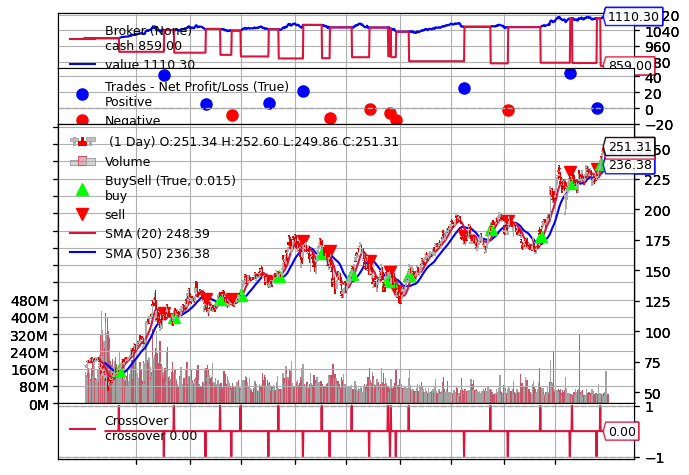

[[<Figure size 800x600 with 15 Axes>]]

In [237]:
#visualiser le résultat sur un graphique
%matplotlib inline 

figs = cerebro.plot(iplot=False, style='candlestick', volume=True)
figs

### Mesure de la performance de la stratégie

In [240]:
#Calcul du rendement
#initialisation du capital
capital_initial = 10000
capital_final = cerebro.broker.getvalue()

rendement = (capital_final - capital_initial) / capital_initial * 100

print(f" Capital initial : {capital_initial:.2f} $")
print(f" Capital final : {capital_final:.2f} $")
print(f" Rendement total : {rendement:.2f} %")

 Capital initial : 10000.00 $
 Capital final : 10110.30 $
 Rendement total : 1.10 %


In [241]:
# Option 1 : récupérer l'évolution du portefeuille à chaque step (nécessite une petite modification dans la stratégie)

# Adapter les données pour Backtrader
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),
    )

# Stratégie SMA croisée enrichie
class SMACross(bt.Strategy):
    def __init__(self):
        self.sma1 = bt.ind.SMA(period=20)
        self.sma2 = bt.ind.SMA(period=50)
        self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
        self.portfolio_values = []
        self.trades = []

    def next(self):
        self.portfolio_values.append(self.broker.getvalue())

        if not self.position:
            if self.cross > 0:
                self.buy_price = self.data.close[0]
                self.buy()
        elif self.cross < 0:
            if self.position:
                sell_price = self.data.close[0]
                gain = sell_price - self.buy_price
                self.trades.append(gain)
                self.sell()

    def stop(self):
        # Capital
        capital_initial = cerebro.startingcash
        capital_final = self.broker.getvalue()
        rendement = (capital_final - capital_initial) / capital_initial * 100

        # Drawdown max
        peak = self.portfolio_values[0]
        max_dd = 0
        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val) / peak
            if dd > max_dd:
                max_dd = dd

        # Statistiques sur les trades
        total_trades = len(self.trades)
        winning_trades = len([t for t in self.trades if t > 0])
        losing_trades = total_trades - winning_trades
        win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
        avg_gain = sum(self.trades) / total_trades if total_trades > 0 else 0
        gains = [t for t in self.trades if t > 0]
        losses = [t for t in self.trades if t < 0]
        avg_win = sum(gains) / len(gains) if gains else 0
        avg_loss = abs(sum(losses) / len(losses)) if losses else 0
        gain_loss_ratio = avg_win / avg_loss if avg_loss > 0 else 0

        # Affichage des résultats
        print("----- Résultats de la stratégie -----")
        print(f"Capital initial     : {capital_initial:.2f} $")
        print(f"Capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawdown maximal    : {max_dd * 100:.2f} %")
        print(f"Nombre de trades    : {total_trades}")
        print(f"Trades gagnants     : {winning_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate:.2f} %")
        print(f"Gain moyen / trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f}")

# Backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(PandasData(dataname=data))
cerebro.broker.setcash(10000.0)
cerebro.startingcash = 10000.0

cerebro.run()

----- Résultats de la stratégie -----
Capital initial     : 10000.00 $
Capital final       : 10110.30 $
Rendement total     : 1.10 %
Drawdown maximal    : 0.49 %
Nombre de trades    : 13
Trades gagnants     : 8
Trades perdants     : 5
Taux de réussite    : 61.54 %
Gain moyen / trade  : 7.03 $
Ratio gain/perte    : 1.77


### Conclusion

La stratégie SMA Cross démontre une approche prudente et disciplinée avec un taux de réussite satisfaisant de 61.54% et un risque maîtrisé (drawdown de 0.49%). Cependant, le rendement modeste de 1.10% sur 13 trades soulève des questions sur sa viabilité économique après déduction des frais de transaction et sa capacité à surperformer une simple stratégie Buy & Hold. Des optimisations des paramètres et une validation sur une période plus longue sont nécessaires avant d'envisager un déploiement en conditions réelles.